In [1]:
!pip install -q scikit-surprise

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib Inline
import seaborn as sns

In [4]:
dfanime = pd.read_csv('animes.csv')

In [5]:
dfanime.head()

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...


In [6]:
dfanime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19311 entries, 0 to 19310
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uid         19311 non-null  int64  
 1   title       19311 non-null  object 
 2   synopsis    18336 non-null  object 
 3   genre       19311 non-null  object 
 4   aired       19311 non-null  object 
 5   episodes    18605 non-null  float64
 6   members     19311 non-null  int64  
 7   popularity  19311 non-null  int64  
 8   ranked      16099 non-null  float64
 9   score       18732 non-null  float64
 10  img_url     19131 non-null  object 
 11  link        19311 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 1.8+ MB


In [7]:
dfanime.dropna(subset = ['synopsis'], inplace=True)

In [8]:
dfanime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18336 entries, 0 to 19310
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uid         18336 non-null  int64  
 1   title       18336 non-null  object 
 2   synopsis    18336 non-null  object 
 3   genre       18336 non-null  object 
 4   aired       18336 non-null  object 
 5   episodes    17801 non-null  float64
 6   members     18336 non-null  int64  
 7   popularity  18336 non-null  int64  
 8   ranked      15509 non-null  float64
 9   score       17900 non-null  float64
 10  img_url     18184 non-null  object 
 11  link        18336 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 1.8+ MB


In [9]:
dfsyn = dfanime[['synopsis', 'genre']]

In [23]:
dfsyn

,synopsis,genrelist
0,Following their participation at the Inter-Hig...,"[Comedy, Sports, Drama, School, Shounen]"
1,Music accompanies the path of the human metron...,"[Drama, Music, Romance, School, Shounen]"
2,The Abyss—a gaping chasm stretching down into ...,"[Sci-Fi, Adventure, Mystery, Drama, Fantasy]"
3,"""In order for something to be obtained, someth...","[Action, Military, Adventure, Comedy, Drama, M..."
4,After helping revive the legendary vampire Kis...,"[Action, Mystery, Supernatural, Vampire]"
...,...,...
19306,Cocona is an average middle schooler living wi...,"[Sci-Fi, Adventure, Comedy, Magic]"
19307,"While visiting the National Library, junior-hi...","[Adventure, Fantasy, Magic, Martial Arts, Come..."
19308,"Years ago, all of the ghosts in a haunted scho...","[Mystery, Horror, Supernatural]"
19309,Inuyasha and company have finally destroyed Na...,"[Action, Adventure, Comedy, Historical, Demons..."


In [22]:
#imprinting pprint for pretty printing
from pprint import pprint
#importing defaultdict
from collections import defaultdict
#saving total genres here.
hash_map = defaultdict(lambda: 0)
#saving each row's genre in genrelist
genrelist = []
for text in dfanime['genre']:
    templist = text[2:len(text)-2].split("', '")
    for i in range(len(templist)):
        if templist[i] == '':
            templist.pop(i)
            break
    genrelist.append(templist)
    for j in templist:
        hash_map[j] += 1
        
# Adding genrelist Column
dfsyn['genrelist'] = genrelist

pprint(len(hash_map))
pprint(hash_map)

43
defaultdict(<function <lambda> at 0x000001F36F04D000>,
            {'Action': 4034,
             'Adventure': 3036,
             'Cars': 128,
             'Comedy': 6186,
             'Dementia': 405,
             'Demons': 577,
             'Drama': 2933,
             'Ecchi': 784,
             'Fantasy': 3259,
             'Game': 380,
             'Harem': 423,
             'Hentai': 2328,
             'Historical': 1164,
             'Horror': 505,
             'Josei': 115,
             'Kids': 2354,
             'Magic': 1126,
             'Martial Arts': 397,
             'Mecha': 1146,
             'Military': 651,
             'Music': 1945,
             'Mystery': 849,
             'Parody': 680,
             'Police': 296,
             'Psychological': 412,
             'Romance': 2121,
             'Samurai': 230,
             'School': 1853,
             'Sci-Fi': 2731,
             'Seinen': 963,
             'Shoujo': 774,
             'Shoujo Ai': 84,
             'S

C:\Users\ameyd\AppData\Local\Temp\ipykernel_7656\2728779385.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsyn['genrelist'] = genrelist


<Axes: >

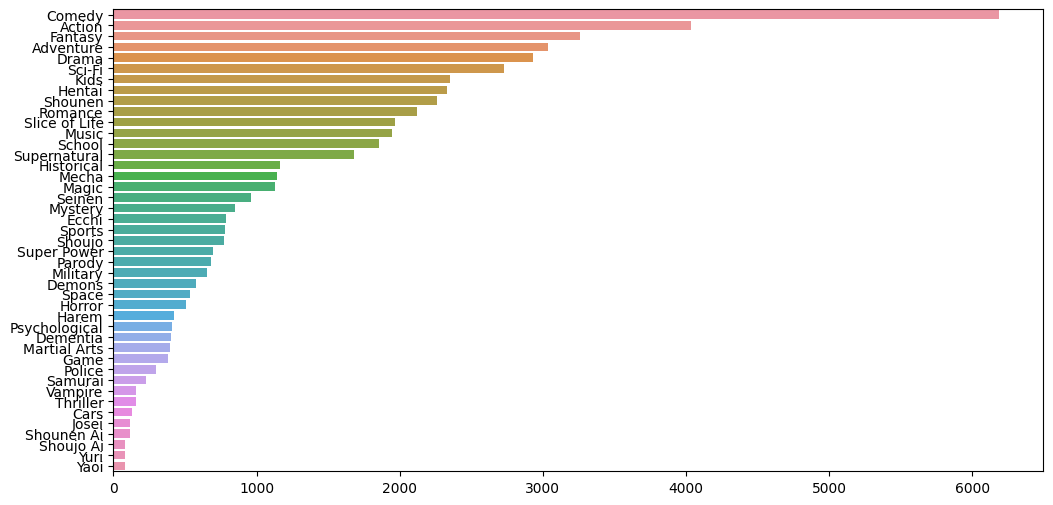

In [27]:
temp = list(hash_map.items())
temp.sort(key=lambda x: x[1], reverse=True)
plt.rcParams['figure.figsize'] = (12, 6)
y,x = [temp[i][0] for i in range(len(temp))], [temp[i][1] for i in range(len(temp))]
sns.barplot(x=x, y=y)

In [30]:
import re

# Function for cleaning the text
def clean_text(text):
    text = re.sub('\'', "", text)
    text = re.sub('[^a-zA-Z]', " ", text)
    text = ' '.join(text.split())
    text = text.lower()
    return text

In [31]:
dfsyn.loc[:, 'cleaned_syn'] = dfsyn.loc[:,'synopsis'].apply(clean_text)
dfsyn

C:\Users\ameyd\AppData\Local\Temp\ipykernel_7656\1092377339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsyn.loc[:, 'cleaned_syn'] = dfsyn.loc[:,'synopsis'].apply(clean_text)


,synopsis,genrelist,cleaned_syn
0,Following their participation at the Inter-Hig...,"[Comedy, Sports, Drama, School, Shounen]",following their participation at the inter hig...
1,Music accompanies the path of the human metron...,"[Drama, Music, Romance, School, Shounen]",music accompanies the path of the human metron...
2,The Abyss—a gaping chasm stretching down into ...,"[Sci-Fi, Adventure, Mystery, Drama, Fantasy]",the abyss a gaping chasm stretching down into ...
3,"""In order for something to be obtained, someth...","[Action, Military, Adventure, Comedy, Drama, M...",in order for something to be obtained somethin...
4,After helping revive the legendary vampire Kis...,"[Action, Mystery, Supernatural, Vampire]",after helping revive the legendary vampire kis...
...,...,...,...
19306,Cocona is an average middle schooler living wi...,"[Sci-Fi, Adventure, Comedy, Magic]",cocona is an average middle schooler living wi...
19307,"While visiting the National Library, junior-hi...","[Adventure, Fantasy, Magic, Martial Arts, Come...",while visiting the national library junior hig...
19308,"Years ago, all of the ghosts in a haunted scho...","[Mystery, Horror, Supernatural]",years ago all of the ghosts in a haunted schoo...
19309,Inuyasha and company have finally destroyed Na...,"[Action, Adventure, Comedy, Historical, Demons...",inuyasha and company have finally destroyed na...


In [33]:
#importing nltk libraries
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ameyd\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [34]:
### Python Script to remove stopwords
stop_words = set(stopwords.words('english'))
stop_words.add('source')
words = defaultdict(lambda: 0)
def rem_stop(text):
    for i in text.split():
        new_text = []
        if i not in stop_words:
            new_text.append(i)
            words[i] += 1
    new_text = [i for i in text.split() if not i in stop_words]
    return ' '.join(new_text)

dfsyn.loc[:, 'cleaned_syn'] = dfsyn.loc[:, 'cleaned_syn'].apply(rem_stop)
dfsyn

C:\Users\ameyd\AppData\Local\Temp\ipykernel_7656\2297663737.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsyn.loc[:, 'cleaned_syn'] = dfsyn.loc[:, 'cleaned_syn'].apply(rem_stop)


,synopsis,genrelist,cleaned_syn
0,Following their participation at the Inter-Hig...,"[Comedy, Sports, Drama, School, Shounen]",following participation inter high karasuno hi...
1,Music accompanies the path of the human metron...,"[Drama, Music, Romance, School, Shounen]",music accompanies path human metronome prodigi...
2,The Abyss—a gaping chasm stretching down into ...,"[Sci-Fi, Adventure, Mystery, Drama, Fantasy]",abyss gaping chasm stretching depths earth fil...
3,"""In order for something to be obtained, someth...","[Action, Military, Adventure, Comedy, Drama, M...",order something obtained something equal value...
4,After helping revive the legendary vampire Kis...,"[Action, Mystery, Supernatural, Vampire]",helping revive legendary vampire kiss shot ace...
...,...,...,...
19306,Cocona is an average middle schooler living wi...,"[Sci-Fi, Adventure, Comedy, Magic]",cocona average middle schooler living grandmot...
19307,"While visiting the National Library, junior-hi...","[Adventure, Fantasy, Magic, Martial Arts, Come...",visiting national library junior high students...
19308,"Years ago, all of the ghosts in a haunted scho...","[Mystery, Horror, Supernatural]",years ago ghosts haunted schoolhouse banished ...
19309,Inuyasha and company have finally destroyed Na...,"[Action, Adventure, Comedy, Historical, Demons...",inuyasha company finally destroyed naraku star...


In [35]:
tmp = sorted(words, key = lambda x: words[x], reverse = True)

In [37]:
#Total words
values = []
for i in tmp:
    values.append(words[i])
print(sum(values))

730171


<Axes: >

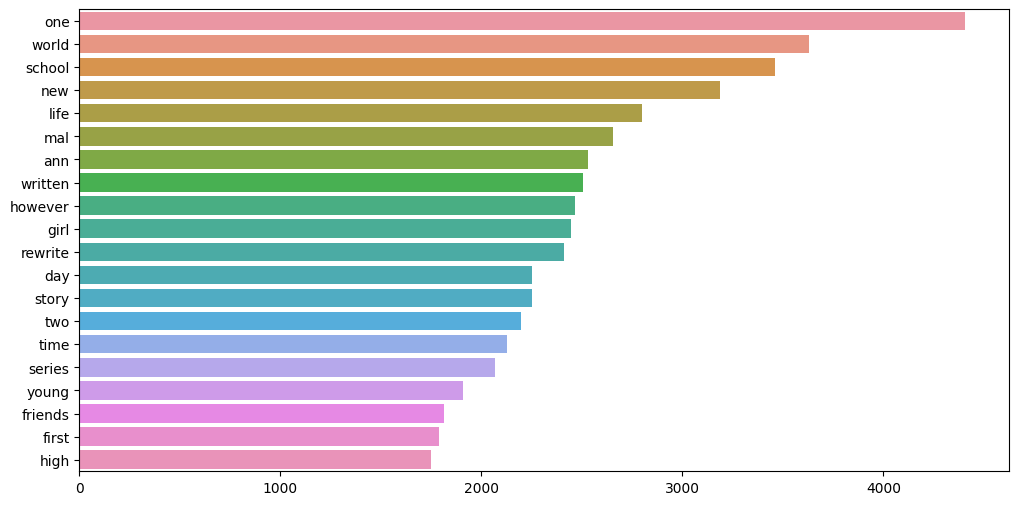

In [38]:
sns.barplot(x=values[:20], y=tmp[:20])

In [40]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(dfsyn['genrelist'])
y = multilabel_binarizer.transform(dfsyn['genrelist'])
print(y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [41]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(dfsyn['cleaned_syn'], y, test_size=0.2,random_state=69)

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xtest_tfidf = tfidf_vectorizer.transform(xtest)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score
from sklearn import svm


model = svm.SVC(kernel='linear')
classif = OneVsRestClassifier(model)

In [53]:
classif.fit(xtrain_tfidf, ytrain)

OneVsRestClassifier(estimator=SVC(kernel='linear'))

In [54]:
y_pred = classif.predict(xtest_tfidf)

In [55]:
f1_score(ytest, y_pred, average='micro')

0.551027991082487

In [56]:
y_pred_prob = classif.predict_proba(xtest_tfidf)

AttributeError: This 'OneVsRestClassifier' has no attribute 'predict_proba'

In [48]:
y_pred_new = (y_pred_prob >= 0.20).astype(int)

In [49]:
f1_score(ytest, y_pred_new, average='micro')

0.574566925715278